# Importing Dataset and Data Preprocessing

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
data= pd.read_csv('yeast.csv',header = None, sep = "\s+")
data.columns = ["Sequence Name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "Class"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sequence Name  1484 non-null   object 
 1   mcg            1484 non-null   float64
 2   gvh            1484 non-null   float64
 3   alm            1484 non-null   float64
 4   mit            1484 non-null   float64
 5   erl            1484 non-null   float64
 6   pox            1484 non-null   float64
 7   vac            1484 non-null   float64
 8   nuc            1484 non-null   float64
 9   Class          1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB


In [59]:
print("Percentage of occurences within the dataset")
round((data["Class"].value_counts()/1484)*100,2)

Percentage of occurences within the dataset


CYT    31.20
NUC    28.91
MIT    16.44
ME3    10.98
ME2     3.44
ME1     2.96
EXC     2.36
VAC     2.02
POX     1.35
ERL     0.34
Name: Class, dtype: float64

In [60]:
data.head()

,Sequence Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [61]:
data.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


In [62]:
data['Class'].value_counts()

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: Class, dtype: int64

In [63]:
data1=data.drop(columns=['Sequence Name','Class'],axis=1)

In [64]:
data1.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22


# Imputation

In [65]:
numerical_columns=['mcg','gvh','alm','mit','erl','pox','vac','nuc']

In [66]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data1[numerical_columns]=imputer.fit_transform(data1[numerical_columns])

In [67]:
data1.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22


In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
dtypes: float64(8)
memory usage: 92.9 KB


# Normalization

In [69]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()    
columns=data1.columns
data1=norm.fit_transform(data1)
data1=pd.DataFrame(data1,columns=columns)
data1.head(10)

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.477548,0.502249,0.386979,0.107037,0.411680,0.000000,0.395212,0.181139
1,0.349190,0.544086,0.389793,0.219259,0.406035,0.000000,0.430397,0.178655
2,0.500382,0.484745,0.383105,0.117277,0.390923,0.000000,0.414379,0.172006
3,0.479716,0.363922,0.471445,0.107523,0.413548,0.000000,0.446632,0.181961
4,0.352357,0.369136,0.402694,0.453030,0.419473,0.000000,0.402694,0.184568
5,0.409497,0.321174,0.449643,0.136499,0.401467,0.401467,0.393438,0.176646
6,0.375420,0.405454,0.360403,0.488046,0.375420,0.000000,0.397945,0.165185
7,0.388948,0.364639,0.478082,0.162062,0.405154,0.000000,0.469979,0.275505
8,0.427372,0.388520,0.512847,0.279735,0.388520,0.000000,0.380750,0.170949
9,0.341618,0.333078,0.512428,0.128107,0.427023,0.000000,0.495347,0.256214


# Correlation among the features

In [70]:
CR=data1.corr() #.abs()
CR

,mcg,gvh,alm,mit,erl,pox,vac,nuc
mcg,1.000000,0.263327,-0.428285,-0.086280,-0.451131,-0.066629,-0.316386,-0.354952
gvh,0.263327,1.000000,-0.512453,-0.121121,-0.340389,-0.077792,-0.223671,-0.298710
alm,-0.428285,-0.512453,1.000000,-0.105141,0.241078,-0.070619,0.033287,-0.006578
mit,-0.086280,-0.121121,-0.105141,1.000000,-0.285763,-0.036988,-0.306584,-0.171350
erl,-0.451131,-0.340389,0.241078,-0.285763,1.000000,-0.143640,0.399296,0.046783
pox,-0.066629,-0.077792,-0.070619,-0.036988,-0.143640,1.000000,-0.096093,-0.073525
vac,-0.316386,-0.223671,0.033287,-0.306584,0.399296,-0.096093,1.000000,0.097357
nuc,-0.354952,-0.298710,-0.006578,-0.171350,0.046783,-0.073525,0.097357,1.000000


# Defining vertices and weights of Graph

In [71]:
Vertices=CR.columns
Vertices
type(Vertices)

pandas.core.indexes.base.Index

In [72]:
Vertices.to_list()

['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']

In [73]:
#No of vertices
N=len(Vertices)
N

8

# Extracting the upper triangular matrix of the correlation matrix to define the weights of the graph

In [74]:
Weights=np.tril(CR,1)
Weights.astype(float)
#Weights=Weights*100

array([[ 1.        ,  0.26332688,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.26332688,  1.        , -0.51245305,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.42828533, -0.51245305,  1.        , -0.10514051,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.08627984, -0.12112102, -0.10514051,  1.        , -0.28576344,
         0.        ,  0.        ,  0.        ],
       [-0.45113109, -0.34038869,  0.24107788, -0.28576344,  1.        ,
        -0.14364021,  0.        ,  0.        ],
       [-0.06662902, -0.07779229, -0.07061905, -0.03698801, -0.14364021,
         1.        , -0.09609303,  0.        ],
       [-0.3163862 , -0.2236707 ,  0.03328685, -0.30658361,  0.39929592,
        -0.09609303,  1.        ,  0.0973571 ],
       [-0.3549523 , -0.29871036, -0.00657828, -0.17134977,  0.04678279,
        -0.07352548,  0.0973571 ,  1.        ]])

In [75]:
Weights

array([[ 1.        ,  0.26332688,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.26332688,  1.        , -0.51245305,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.42828533, -0.51245305,  1.        , -0.10514051,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.08627984, -0.12112102, -0.10514051,  1.        , -0.28576344,
         0.        ,  0.        ,  0.        ],
       [-0.45113109, -0.34038869,  0.24107788, -0.28576344,  1.        ,
        -0.14364021,  0.        ,  0.        ],
       [-0.06662902, -0.07779229, -0.07061905, -0.03698801, -0.14364021,
         1.        , -0.09609303,  0.        ],
       [-0.3163862 , -0.2236707 ,  0.03328685, -0.30658361,  0.39929592,
        -0.09609303,  1.        ,  0.0973571 ],
       [-0.3549523 , -0.29871036, -0.00657828, -0.17134977,  0.04678279,
        -0.07352548,  0.0973571 ,  1.        ]])

# Kruskal's algorithm to find Minimum Spanning Tree 

In [76]:
 
from collections import defaultdict
 
# Class to represent a graph
result = []  # This will store the resultant MST
class Graph:
 
    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = []  # default dictionary to store graph
 
    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
    # function to delete an edge of graph
    def delEdge(self, i):
        self.graph.pop(i)
        
    # A utility function to find set of an element i
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
 
    # A function that does union of two sets of x and y
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
 
        # Attach smaller rank tree under root of high rank tree (Union by Rank)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
 
        # If ranks are same, then make one as root
        # and increment its rank by one
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
 
    # The main function to construct MST using Kruskal's
        # algorithm
    def KruskalMST(self):
     
        # An index variable, used for sorted edges
        i = 0
         
        # An index variable, used for result[]
        e = 0
 
        # Step 1:  Sort all the edges in non-decreasing order of their weight. If we are not allowed to change the
        # given graph, we can create a copy of graph
        
        #print(self.graph)
        self.graph = sorted(self.graph, 
                            key=lambda item: item[2]) #not taking inputs
        #print(self.graph)
 
        parent = []
        rank = []
 
        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        # Number of edges to be taken is equal to V-1
        while e < self.V - 1:
 
            # Step 2: Pick the smallest edge and increment the index for next iteration
            u, v, w = self.graph[i]
            #print("w=",w)
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            # If including this edge does't cause cycle, include it in result and increment the indexof result 
            #for next edge
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
            # Else discard the edge
 
        minimumCost = 0
        print ("Edges in the constructed MST")
        for u, v, weight in result:
                minimumCost += weight
                print("%s -- %s == %f" % (Vertices[u],Vertices[v], Weights[u][v]))
        print("Minimum Spanning Tree" , minimumCost)
 
# Driver code
g = Graph(N)
for i in range(N):
    for j in range(N):
        g.addEdge(i,j,Weights[i][j])
        
# Function call
g.KruskalMST()


Edges in the constructed MST
gvh -- alm == -0.512453
erl -- mcg == -0.451131
alm -- mcg == -0.428285
nuc -- mcg == -0.354952
vac -- mcg == -0.316386
vac -- mit == -0.306584
erl -- pox == -0.143640
Minimum Spanning Tree -2.5134317884056743


In [77]:
print(result)

[[1, 2, -0.5124530542126253], [4, 0, -0.45113108623502074], [2, 0, -0.4282853333139712], [7, 0, -0.35495229677462464], [6, 0, -0.31638619603888374], [6, 3, -0.30658361305826337], [4, 5, -0.14364020877228523]]


In [78]:
!pip install decorator==5.0.9


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


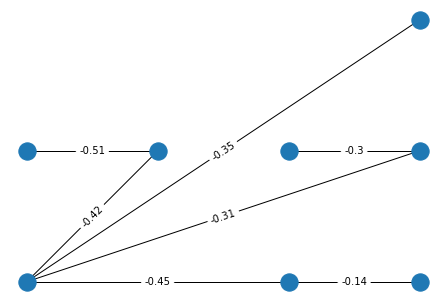

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
i=0
G.add_node(i,pos=(i,i))
G.add_node(1,pos=(0,1))
G.add_node(2,pos=(1,1))
G.add_node(3,pos=(2,1))
G.add_node(4,pos=(2,0))
G.add_node(5,pos=(3,0))
G.add_node(6,pos=(3,1))
G.add_node(7,pos=(3,2))
G.add_edge(1,2,weight=-0.51)
G.add_edge(4,0,weight=-0.45)
G.add_edge(2,0,weight=-0.42)
G.add_edge(7,0,weight=-0.35)
G.add_edge(6,0,weight=-0.31)
G.add_edge(6,3,weight=-0.30)
G.add_edge(4,5,weight=-0.14)

pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig("fig.jpg")

In [80]:
L=len(result)
L

7

In [81]:
result[6]

[4, 5, -0.14364020877228523]

# Removing edges whose weights are greater than threshold

Considering Threshold to be -0.31

In [82]:
result1=result
x=[]
for i in range(len(result1)):
    threshold=-0.31
    p=result1[i]
    temp=p[2]
    if (float(temp)>float(threshold)):
        removed=temp
        x.append(p)
        print("Removed edge with weight:",removed)

print("Removed edges are:",x)

Removed edge with weight: -0.30658361305826337
Removed edge with weight: -0.14364020877228523
Removed edges are: [[6, 3, -0.30658361305826337], [4, 5, -0.14364020877228523]]


# Graph after removing the edge

In [83]:
for u, v, weight in x:
    print("%s -- %s == %f" % (Vertices[u],Vertices[v], Weights[u][v]),'has been removed')
    print("Feature: %s" % (Vertices[v]),'has been removed')

vac -- mit == -0.306584 has been removed
Feature: mit has been removed
erl -- pox == -0.143640 has been removed
Feature: pox has been removed


In [84]:
def remove_common(a, b):
    for i in a[:]:
        if i in b:
            a.remove(i)
            b.remove(i)
    return a

In [85]:
new_res=remove_common(result,x)
print(new_res)

[[1, 2, -0.5124530542126253], [4, 0, -0.45113108623502074], [2, 0, -0.4282853333139712], [7, 0, -0.35495229677462464], [6, 0, -0.31638619603888374]]


In [86]:
print("Remaining features and their weights:")
for u, v, weight in new_res:
    print("%s -- %s == %f" % (Vertices[u],Vertices[v], Weights[u][v]))

Remaining features and their weights:
gvh -- alm == -0.512453
erl -- mcg == -0.451131
alm -- mcg == -0.428285
nuc -- mcg == -0.354952
vac -- mcg == -0.316386


# Final Reduced Dataset

In [87]:
print("Reduced dataset:")
data2=data1.drop(['pox', 'mit'], axis=1)
data2.head()

Reduced dataset:


,mcg,gvh,alm,erl,vac,nuc
0,0.477548,0.502249,0.386979,0.411680,0.395212,0.181139
1,0.349190,0.544086,0.389793,0.406035,0.430397,0.178655
2,0.500382,0.484745,0.383105,0.390923,0.414379,0.172006
3,0.479716,0.363922,0.471445,0.413548,0.446632,0.181961
4,0.352357,0.369136,0.402694,0.419473,0.402694,0.184568
